<a href="https://colab.research.google.com/github/NadunAnsanayaka/Assignment-Submission-Day-1/blob/main/minerals_assignment_group_07_final_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


##Metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

#Regressors
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Read Data
df = pd.read_csv("original_dataset.csv")

In [ ]:
# Reads first 5 rows of the data
df.head(5)

,InitialpH,Solid%,Inoculum%,Time(days),Cu,Mo,Re
0,1.6,3.0,5.0,0,0.00,0.00,0.00
1,1.6,3.0,5.0,5,37.80,0.35,1.98
2,1.6,3.0,5.0,10,40.59,0.51,8.43
3,1.6,3.0,5.0,15,42.89,1.34,9.35
4,1.6,3.0,5.0,20,42.89,2.26,10.45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   InitialpH   105 non-null    float64
 1   Solid%      105 non-null    float64
 2   Inoculum%   105 non-null    float64
 3   Time(days)  105 non-null    int64  
 4   Cu          105 non-null    float64
 5   Mo          105 non-null    float64
 6   Re          105 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 5.9 KB


In [ ]:
# checking for null values
df.isnull().sum()

InitialpH     0
Solid%        0
Inoculum%     0
Time(days)    0
Cu            0
Mo            0
Re            0
dtype: int64

#### Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f617e3377f0>,
      dtype=object)

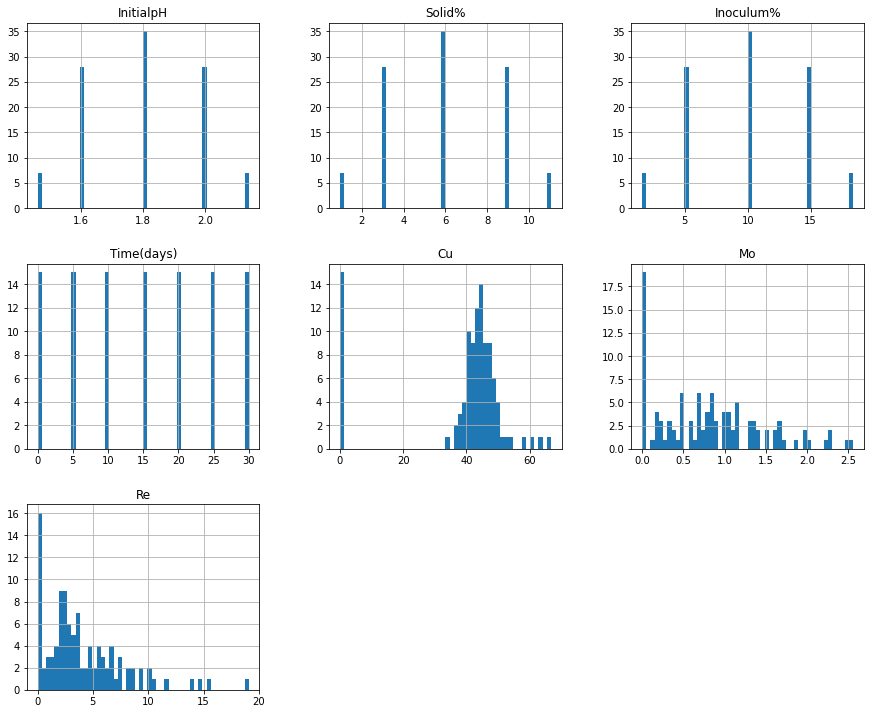

In [ ]:
df.hist(figsize=(15,30),layout=(7,3),bins=50)

In [ ]:
print(df['InitialpH'].unique())
print(df['Solid%'].unique())
print(df['Inoculum%'].unique())
print(df['Time(days)'].unique())

[1.6  2.   1.46 2.14 1.8 ]
[ 3.    9.    6.    0.95 11.05]
[ 5.   15.   10.    1.59 18.41]
[ 0  5 10 15 20 25 30]


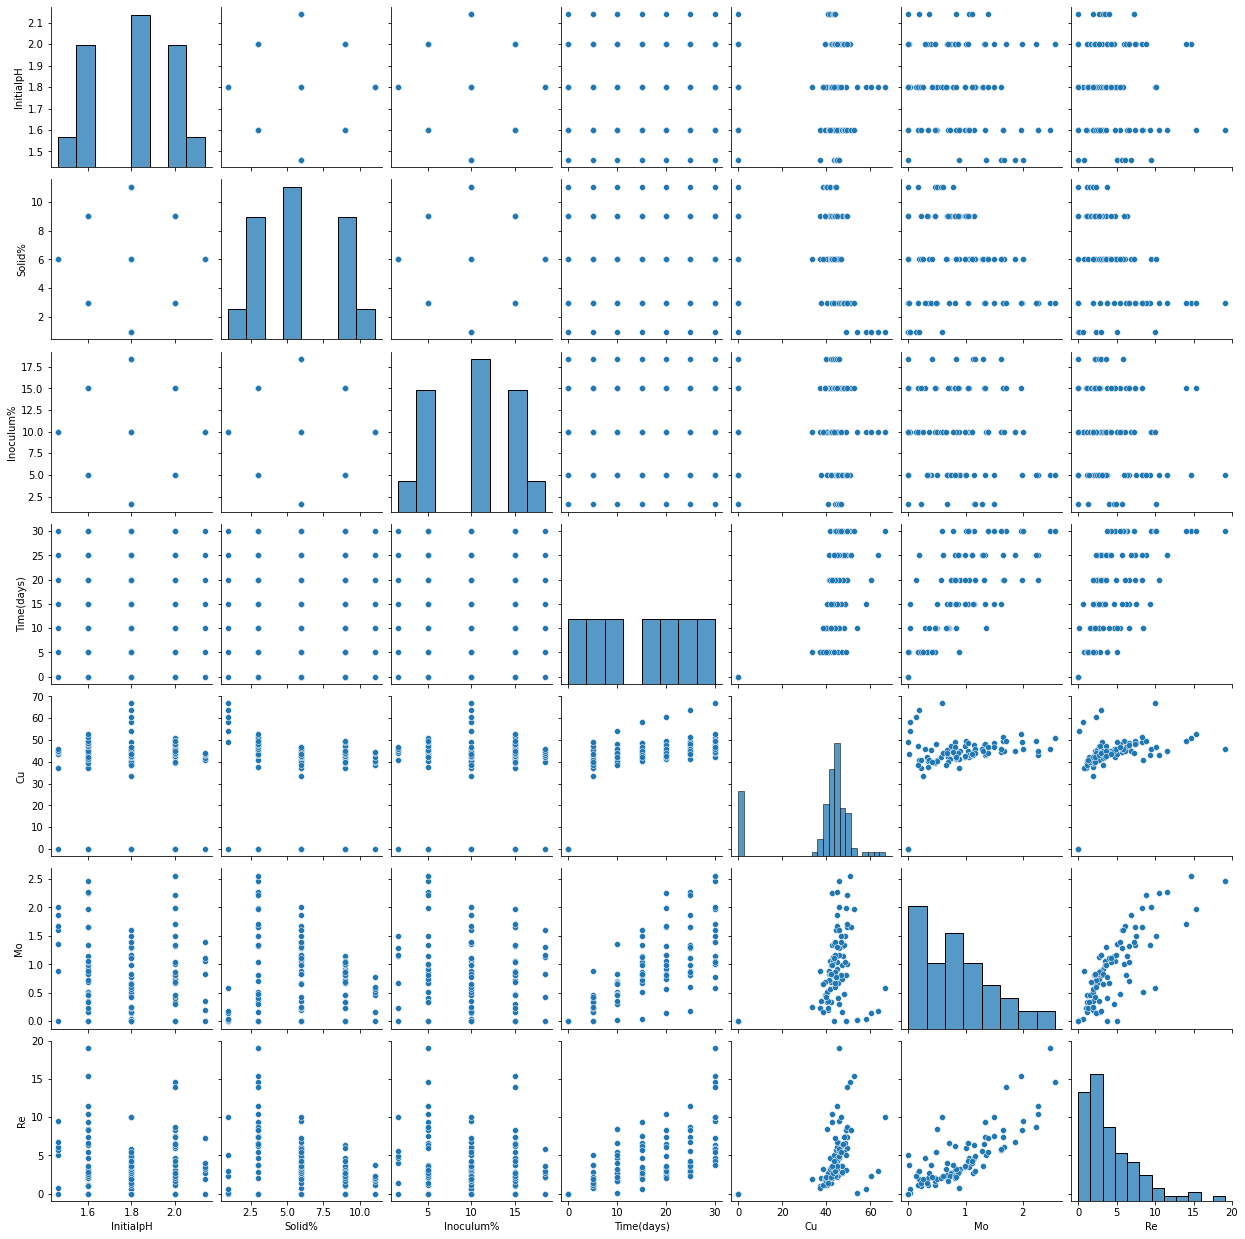

In [ ]:
# Let's see the possible best variables for modeling the carat
sns.pairplot(df)  

In [ ]:
#  Measure the strength of the linear relationship between two variables
df.corr().style.background_gradient(cmap="Blues")

,InitialpH,Solid%,Inoculum%,Time(days),Cu,Mo,Re
InitialpH,1.000000,0.000000,-0.000000,0.000000,0.018230,-0.140320,-0.103391
Solid%,0.000000,1.000000,-0.000000,-0.000000,-0.153256,-0.145281,-0.399236
Inoculum%,-0.000000,-0.000000,1.000000,0.000000,-0.016603,-0.087326,-0.133108
Time(days),0.000000,-0.000000,0.000000,1.000000,0.691440,0.761875,0.675640
Cu,0.018230,-0.153256,-0.016603,0.691440,1.000000,0.525574,0.529080
Mo,-0.140320,-0.145281,-0.087326,0.761875,0.525574,1.000000,0.832898
Re,-0.103391,-0.399236,-0.133108,0.675640,0.529080,0.832898,1.000000


In [ ]:
# Generate descriptive statistics.
df.describe()

,InitialpH,Solid%,Inoculum%,Time(days),Cu,Mo,Re
count,105.000000,105.000000,105.00000,105.000000,105.000000,105.000000,105.000000
mean,1.800000,6.000000,10.00000,15.000000,38.629619,0.813429,4.076667
std,0.192614,2.877357,4.79402,10.047962,16.577054,0.648056,3.668650
min,1.460000,0.950000,1.59000,0.000000,0.000000,0.000000,0.000000
25%,1.600000,3.000000,5.00000,5.000000,40.530000,0.250000,1.860000
50%,1.800000,6.000000,10.00000,15.000000,43.680000,0.780000,3.060000
75%,2.000000,9.000000,15.00000,25.000000,46.610000,1.170000,5.830000
max,2.140000,11.050000,18.41000,30.000000,66.770000,2.560000,19.100000


All variables are numerical variables, enconding is not required. 
Maximum Cu, Mo, Re extractions are 66.7%, 2.56%, 19.1% sequentially. 



#### Training

In [ ]:
# Splitting target variables and input variables
X = df[['InitialpH', 'Solid%', 'Inoculum%', 'Time(days)']]
y = df[['Cu', 'Mo', 'Re']]

In [ ]:
#  Preprocessing – Scaling the features

# Standardization is required before building the model since KNN is a distance based algorithm. If the data
# is not standardized, variables with higher value range will have bigger influence in final result.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=42)

In [ ]:
# printing out dataset sizes
print(f'Train: {X_train.shape, y_train.shape} \nTest: {X_test.shape, y_test.shape}')

Train: ((84, 4), (84, 3)) 
Test: ((21, 4), (21, 3))


In [ ]:
# Finding optimal K value

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.689561700090662
RMSE value for k=  2 is: 7.713502591055649
RMSE value for k=  3 is: 5.788302364949295
RMSE value for k=  4 is: 4.377791105148515
RMSE value for k=  5 is: 3.431346026788257
RMSE value for k=  6 is: 3.5020779923568615
RMSE value for k=  7 is: 4.090006981713263
RMSE value for k=  8 is: 4.529749694151617
RMSE value for k=  9 is: 4.975192582267408
RMSE value for k=  10 is: 4.901831500928207
RMSE value for k=  11 is: 4.833620865662036
RMSE value for k=  12 is: 5.230660744839165
RMSE value for k=  13 is: 5.538868005027771
RMSE value for k=  14 is: 5.474845717762369
RMSE value for k=  15 is: 5.386370023001703
RMSE value for k=  16 is: 5.373062766897834
RMSE value for k=  17 is: 5.555635293270798
RMSE value for k=  18 is: 5.692889374279775
RMSE value for k=  19 is: 5.7684047111922405
RMSE value for k=  20 is: 5.880259693879201


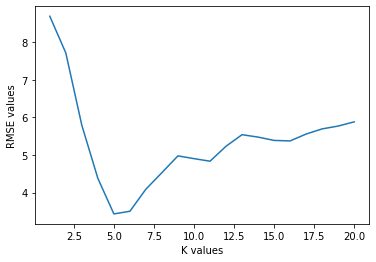

In [ ]:
# Visualize RMSE value to find optimal K value
x_list = [item for item in range(1, 21)]
x_list
plt.plot( x_list ,rmse_val)
plt.xlabel('K values')
plt.ylabel('RMSE values')
plt.show()

In [ ]:
# K = 5 gives the lowest RMSE value
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Now let's the see the prediction with unseen data (test data)
final_predict = knn_model.predict(X_test)
RMSE_error = mean_squared_error(y_test,final_predict, squared=False)
print(RMSE_error)

2.4724382568888776


In [ ]:
# Find R2 Value - coefficient of determination of the prediction [0-1]
knn_model.score(X_test, y_test)

0.7842017085519303

In [ ]:
# check RMSE values for seperate outputs
y_test_Cu = y_test.iloc[:,0]
y_test_Mo = y_test.iloc[:,1]
y_test_Re = y_test.iloc[:,2]

y_pred_Cu = final_predict[:,0]
y_pred_Mo = final_predict[:,1]
y_pred_Re = final_predict[:,2]

RMSE_error_Cu = sqrt(mean_squared_error(y_test_Cu,y_pred_Cu))
RMSE_error_Mo = sqrt(mean_squared_error(y_test_Mo,y_pred_Mo))
RMSE_error_Re = sqrt(mean_squared_error(y_test_Re,y_pred_Re))

print(RMSE_error_Cu)
print(RMSE_error_Mo)
print(RMSE_error_Re)

5.787186305393437
0.31395450079817067
1.3161739644750252


#### Method - 02

In [ ]:
# Distance based algorithms can greatly affect from outliers
# Removing Outliers
df_edited = df[df['Time(days)'] != 0]

In [ ]:
# Splitting target variables and input variables
X = df_edited[['InitialpH', 'Solid%', 'Inoculum%', 'Time(days)']]
y = df_edited[['Cu', 'Mo', 'Re']]

In [ ]:
#  Preprocessing – Scaling the features

# Standardization is required before building the model since KNN is a distance based algorithm. If the data
# is not standardized, variables with higher value range will have bigger influence in final result.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=42)

In [ ]:
# Finding optimal K value
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.162136717505437
RMSE value for k=  2 is: 2.1444545192624593
RMSE value for k=  3 is: 1.9921387683662963
RMSE value for k=  4 is: 2.2469909663320364
RMSE value for k=  5 is: 2.4293262745354207
RMSE value for k=  6 is: 2.5605220259289876
RMSE value for k=  7 is: 2.6969175456289696
RMSE value for k=  8 is: 2.8245653652048506
RMSE value for k=  9 is: 2.8101978664265284
RMSE value for k=  10 is: 2.781006675581637
RMSE value for k=  11 is: 2.887319614216146
RMSE value for k=  12 is: 2.9212108361920044
RMSE value for k=  13 is: 2.9508983744454933
RMSE value for k=  14 is: 3.032224492703279
RMSE value for k=  15 is: 3.113057499611078
RMSE value for k=  16 is: 3.126080181368868
RMSE value for k=  17 is: 3.184277919443558
RMSE value for k=  18 is: 3.206102530877673
RMSE value for k=  19 is: 3.2803471678783835
RMSE value for k=  20 is: 3.278061940130682


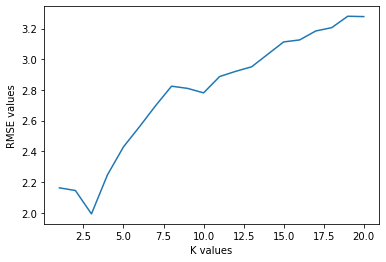

In [ ]:
# Visualize RMSE value to find optimal K value
x_list = [item for item in range(1, 21)]
x_list
plt.plot( x_list ,rmse_val)
plt.xlabel('K values')
plt.ylabel('RMSE values')
plt.show()

In [ ]:
# K = 3 gives the lowest RMSE value
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Now let's the calculate overall RMSE error with unseen data (test data)
final_predict = knn_model.predict(X_test)
RMSE_error = mean_squared_error(y_test,final_predict, squared=False)
print(RMSE_error)

1.6916860194683003


In [ ]:
# Find R2 Value - coefficient of determination of the prediction [0-1]
knn_model.score(X_test, y_test)

0.7808096561796516

In [ ]:
# check RMSE values for seperate outputs
y_test_Cu = y_test.iloc[:,0]
y_test_Mo = y_test.iloc[:,1]
y_test_Re = y_test.iloc[:,2]

y_pred_Cu = final_predict[:,0]
y_pred_Mo = final_predict[:,1]
y_pred_Re = final_predict[:,2]

RMSE_error_Cu = sqrt(mean_squared_error(y_test_Cu,y_pred_Cu))
RMSE_error_Mo = sqrt(mean_squared_error(y_test_Mo,y_pred_Mo))
RMSE_error_Re = sqrt(mean_squared_error(y_test_Re,y_pred_Re))

print(RMSE_error_Cu)
print(RMSE_error_Mo)
print(RMSE_error_Re)

2.5646717836839654
0.21181170300732724
2.298574571713608


In [ ]:
print(final_predict)


[[42.66333333  1.03        3.57      ]
 [47.46333333  0.81        3.67666667]
 [41.08333333  0.64666667  2.33      ]
 [42.39333333  0.62        2.52      ]
 [41.43333333  0.69333333  6.36666667]
 [48.26        0.77        5.23      ]
 [40.88666667  0.75333333  3.02      ]
 [58.96666667  0.76333333  6.88      ]
 [49.46        2.01333333 10.13333333]
 [40.95333333  0.65666667  1.66      ]
 [44.58        1.34666667  4.05333333]
 [47.19333333  1.42333333  6.60666667]
 [42.34        0.78666667  3.13      ]
 [38.19333333  0.63333333  2.92333333]
 [42.33666667  0.59666667  2.33666667]
 [43.87333333  2.02333333 12.96666667]
 [43.69        0.52333333  1.98333333]
 [48.95666667  1.64333333  8.78333333]]
